Criar um modelo de regressao para prever os custos médicos individuais cobrados pela seguradora

In [1]:
import pandas as pd

df = pd.read_csv("insurance.csv")
print(df.describe())
df.head()

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Podemos ver que nossos dados não possuem dados nulos, porem os campos "sex", "smoker" e "region" são colunas categóricas, portanto precisaremos converter para numericas

Tambem podemos ver que a escala dos valores sao bem distintas entre as colunas

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
df_num = df.copy()
df_num['sex'] = labelEncoder.fit_transform(df['sex'])
df_num['smoker'] = labelEncoder.fit_transform(df['smoker'])
df_num['region'] = labelEncoder.fit_transform(df['region'])

df_num.head()

Vamos analisar alguns gráficos:

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'region'}>],
       [<Axes: title={'center': 'charges'}>, <Axes: >, <Axes: >]],
      dtype=object)

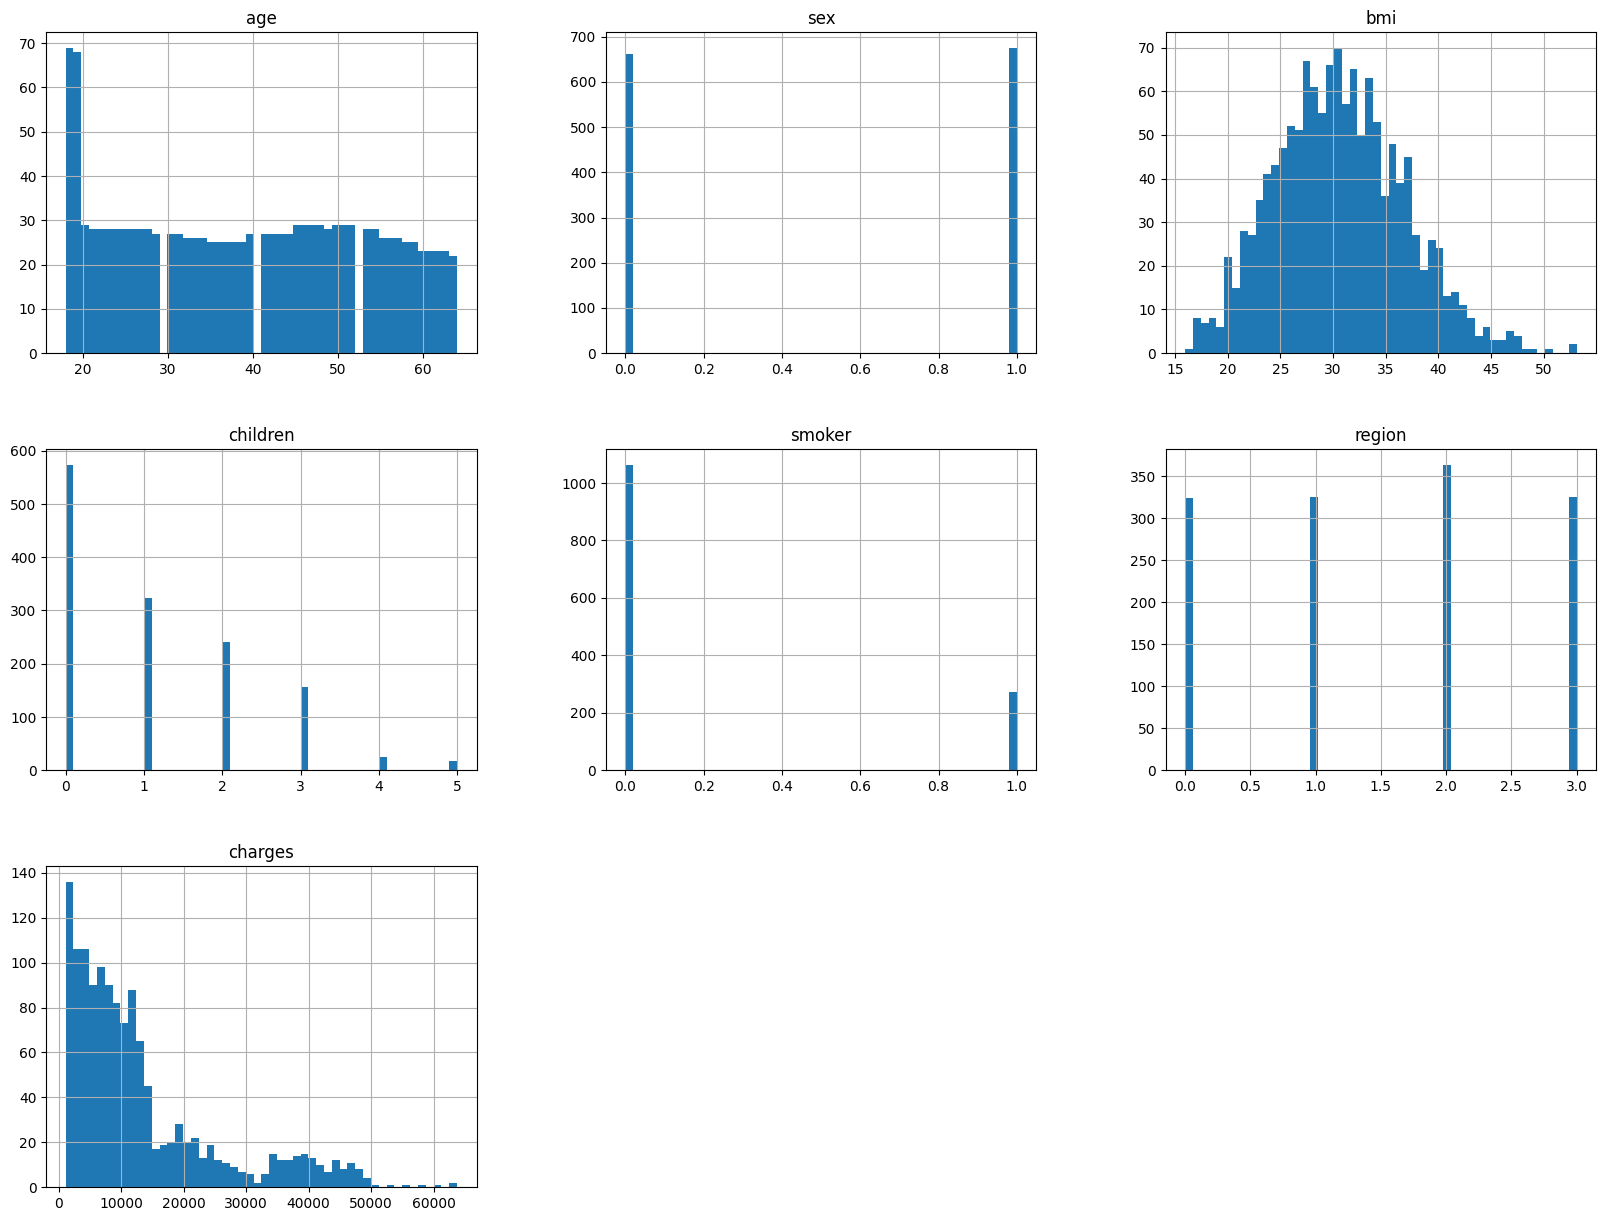

In [ ]:
df_num.hist(bins=50, figsize=(20,15))

Temos uma grande quantidade de pessoas com 18 e 19 anos,
a distribuição entre os sexos e as regioes estao bem equilibradas

{'whiskers': [<matplotlib.lines.Line2D at 0x1f9de953690>,
 'caps': [<matplotlib.lines.Line2D at 0x1f9de964910>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f9de952e10>],
 'medians': [<matplotlib.lines.Line2D at 0x1f9de965790>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f9de965f90>],
 'means': []}

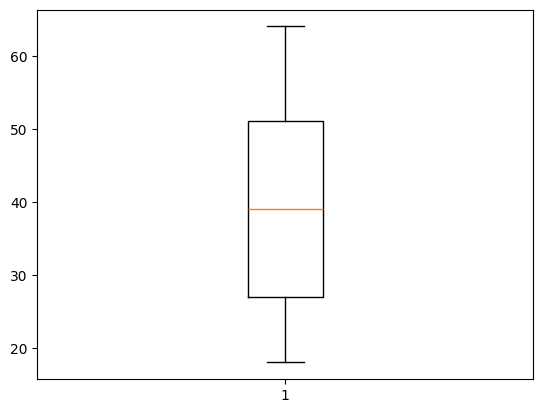

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(df_num['age'])

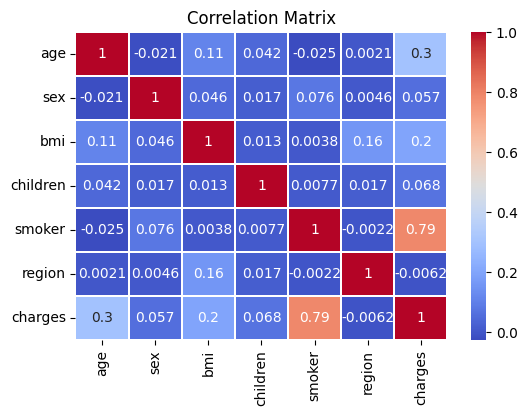

In [ ]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(df_num.corr(), cmap='coolwarm', annot=True, linewidths=.1)
plt.title('Correlation Matrix')
plt.show()

A unica correlação relevante fumantes e o valor dos encargos cobrados

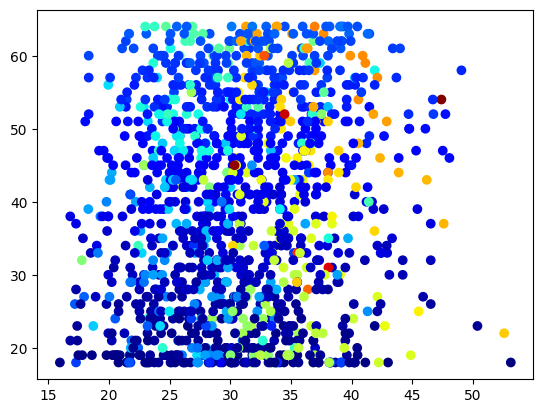

In [ ]:
plt.scatter(df_num['bmi'], df_num['age'], c=df_num['charges'], cmap=plt.get_cmap("jet"))

Vamos separar os dados em teste e treino para poder escalonar

In [ ]:
from sklearn.model_selection import train_test_split

X = df_num.drop(columns='charges',axis=1)
y = df_num['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

x_train_scaled

array([[ 0.47222651, -1.0246016 , -1.75652513,  0.73433626, -0.50874702,
        -0.45611589],
       [ 0.54331294, -1.0246016 , -1.03308239, -0.91119211, -0.50874702,
        -1.35325561],
       [ 0.8987451 , -1.0246016 , -0.94368672, -0.91119211, -0.50874702,
         0.44102382],
       ...,
       [ 1.3252637 ,  0.97598911, -0.89153925, -0.91119211, -0.50874702,
        -1.35325561],
       [-0.16755139, -1.0246016 ,  2.82086429,  0.73433626,  1.96561348,
         1.33816354],
       [ 1.1120044 ,  0.97598911, -0.10932713, -0.91119211, -0.50874702,
         1.33816354]])

Vamos fazer a regressao nos dados sem o escalonamento e depois com para comparar

In [ ]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
linReg.fit(X_train, y_train)

predictions = linReg.predict(X_test)

from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error
rms = root_mean_squared_error(y_test, predictions)
print(f"rms: {rms:.3f}")
mape = mean_absolute_percentage_error(y_test, predictions)
print(f"MAPE: {mape:.3f}")

rms: 5799.587
MAPE: 0.471


In [ ]:

linReg_prepared = LinearRegression()
linReg_prepared.fit(x_train_scaled, y_train)

predictions = linReg_prepared.predict(x_test_scaled)

rms = root_mean_squared_error(y_test, predictions)
print(f"rms: {rms:.3f}")
mape = mean_absolute_percentage_error(y_test, predictions)
print(f"MAPE: {mape:.3f}")


rms: 5799.587
MAPE: 0.471


In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=42)

tree.fit(X_train, y_train)

dt_predict = tree.predict(X_test)

dt_rms = root_mean_squared_error(y_test, dt_predict)
print(f"rms: {dt_rms:.3f}")
dt_mape = mean_absolute_percentage_error(y_test, dt_predict)
print(f"MAPE: {dt_mape:.3f}")

rms: 7000.232
MAPE: 0.350
